# Título
## Preprocesamiento de Datos
### Leer un archivo de audio
### Tomar una muestra

In [9]:
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import audiosegment as audio
import numpy as np
from scipy import signal
from scipy.io import wavfile
%matplotlib inline

[ -7487  -9182 -10453 ...    282    141  -1131]


Text(0, 0.5, 'Frecuencia (Hz)')

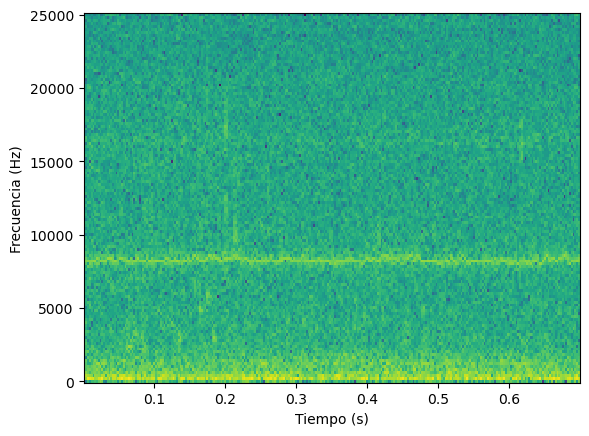

In [36]:
BIT_RATE = 50000
WORKING_DIR = os.getcwd()
AUDIO_FILE = os.path.join(WORKING_DIR, 'dataset_full', '2ba79755986a6862dbdba0b6406093da.wav')
entity_sound = AudioSegment.from_file(AUDIO_FILE, start_second=149.342, duration=0.7)

# https://en.wikipedia.org/wiki/Decibel#Definitions
decibels = 43
sample_file = os.path.join(WORKING_DIR, 'processing_dir', 'sample.wav')
entity_amplified = entity_sound + decibels
entity_amplified.export(sample_file, format='wav', bitrate='50')

entity_sound = audio.from_file(sample_file)
print(entity_sound.to_numpy_array())
freqs, times, amplitudes = entity_sound.spectrogram(window_length_s=0.005)
amplitudes = 10 * np.log10(amplitudes + 1e-9)

plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')


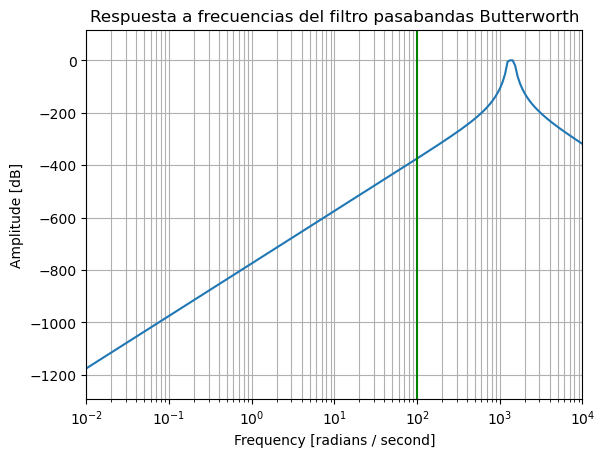

In [32]:
b, a = signal.butter(10, [1250, 1500], 'bandpass', analog=True)
w, h = signal.freqs(b, a)

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta a frecuencias del filtro pasabandas Butterworth')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


In [42]:
def bandpass_filter(dt, order=10):
    b, a = signal.butter(order, [1200, 1500], 'bandpass', analog=True)
    y = signal.lfilter(b, a, dt)
    return y

filtered = np.apply_along_axis(bandpass_filter, 0, entity_sound.to_numpy_array())
print(filtered)

sample_file_filtered = os.path.join(WORKING_DIR, 'processing_dir', 'sample_filtered.wav')
wavfile.write(sample_file_filtered, BIT_RATE, filtered)


[-4.42099863e+28  8.47288620e+31  7.14587887e+35 ...             nan
             nan             nan]
